# Childhood Vaccination Data - Geography

This data is from the [nychealth github](https://github.com/nychealth/immunization-data).

This repository contains data on routine immunizations administered to New York City (NYC) children ages 0 to 18 years and reported to the [Citywide Immunization Registry](https://www.nyc.gov/site/doh/providers/reporting-and-services/citywide-immunization-registry-cir.page) (CIR). These data are available on the NYC Health Department’s [Childhood Vaccination Data Explorer](https://www.nyc.gov/site/doh/data/data-sets/childhood-vaccination-data.page).

In [1]:
import pandas as pd
import numpy as np
import warnings, os
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Main_Routine_Vaccine_Geo.csv')

df.head()

,DATE_CREATED,AGE_GROUP,DOB_RANGE,VACCINE_GROUP,DOSES,YEAR_COVERAGE,QUARTER,BOROUGH,MODZCTA,LABEL,NEIGHBORHOOD_NAME,POP_DENOMINATOR_YEAR,POP_DENOMINATOR,COUNT_PEOPLE_VAC,PERC_VAC
0,5/16/2025,24 - 35 months,01/01/2022 - 12/31/2022,4313314,4:3:1:3:3:1:4,2024,Q4,Manhattan,10001,"10001, 10118",Chelsea/NoMad/West Chelsea,2024 Vintage Estimates for 2023,104.10,124.0,99.0
1,5/16/2025,24 - 35 months,01/01/2022 - 12/31/2022,4313314,4:3:1:3:3:1:4,2024,Q4,Manhattan,10002,10002,Chinatown/Lower East Side,2024 Vintage Estimates for 2023,479.54,307.0,64.0
2,5/16/2025,24 - 35 months,01/01/2022 - 12/31/2022,4313314,4:3:1:3:3:1:4,2024,Q4,Manhattan,10003,10003,East Village/Gramercy/Greenwich Village,2024 Vintage Estimates for 2023,214.48,155.0,72.0
3,5/16/2025,24 - 35 months,01/01/2022 - 12/31/2022,4313314,4:3:1:3:3:1:4,2024,Q4,Manhattan,10004,10004,Financial District,2024 Vintage Estimates for 2023,36.15,41.0,99.0
4,5/16/2025,24 - 35 months,01/01/2022 - 12/31/2022,4313314,4:3:1:3:3:1:4,2024,Q4,Manhattan,10005,10005,Financial District,2024 Vintage Estimates for 2023,47.51,54.0,99.0


In [3]:
df.shape

(36816, 15)

In [4]:
df.dtypes

DATE_CREATED             object
AGE_GROUP                object
DOB_RANGE                object
VACCINE_GROUP            object
DOSES                    object
YEAR_COVERAGE            object
QUARTER                  object
BOROUGH                  object
MODZCTA                   int64
LABEL                    object
NEIGHBORHOOD_NAME        object
POP_DENOMINATOR_YEAR     object
POP_DENOMINATOR         float64
COUNT_PEOPLE_VAC        float64
PERC_VAC                float64
dtype: object

## Questions
- What NYC borough has the highest average percent of children vaccinated? The lowest?

In [5]:
df.groupby('BOROUGH')['PERC_VAC'].mean().sort_values(ascending=False).to_frame()

,PERC_VAC
BOROUGH,
Manhattan,77.060553
Bronx,72.018846
Queens,67.481182
Brooklyn,62.254418
Staten Island,53.370489


<Axes: ylabel='BOROUGH'>

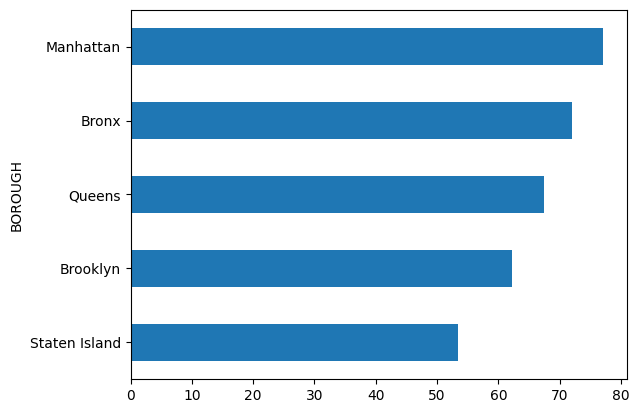

In [6]:
df.groupby('BOROUGH')['PERC_VAC'].mean().sort_values(ascending=True).plot.barh()

In [13]:
modzcta = df.groupby('MODZCTA')['PERC_VAC'].mean().to_frame()

modzcta.rename(columns={'PERC_VAC': 'Percentage vaccinated'}, inplace=True)

modzcta

,Percentage vaccinated
MODZCTA,
10001,83.451923
10002,80.100962
10003,76.889423
10004,93.343284
10005,94.065327
...,...
11691,52.836538
11692,47.879808
11693,44.504808


In [15]:
modzcta.to_csv('modzcta-vaccinated.csv')